In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
iris = pd.read_csv('Fisher.txt', sep='\t')
iris.describe()
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

,Type,PW,PL,SW,SL
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,11.926667,37.786667,30.553333,58.446667
std,0.819232,7.569008,17.776233,4.372791,8.268592
min,0.000000,1.000000,10.000000,20.000000,43.000000
25%,0.000000,3.000000,16.000000,28.000000,51.000000
50%,1.000000,13.000000,44.000000,30.000000,58.000000
75%,2.000000,18.000000,51.000000,33.000000,64.000000
max,2.000000,25.000000,69.000000,44.000000,79.000000


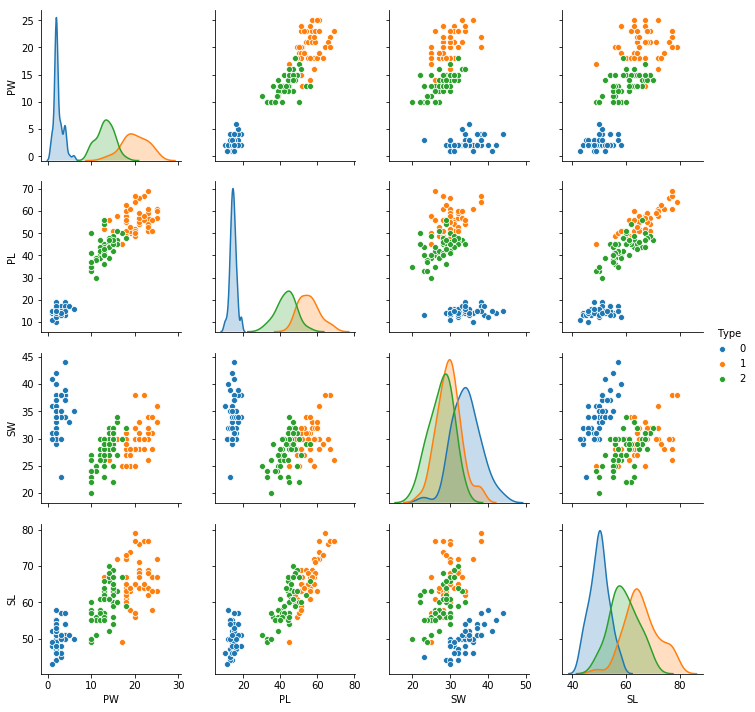

In [4]:
sns.pairplot(data=iris, vars=['PW', 'PL', 'SW', 'SL'], kind='scatter', hue='Type')

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [26]:
import numpy as np

class MultiLayerNet:

    def __init__(self, input_size, hidden_size:list, output_size, loss, weight_init_std=0.01):
        self.net = [input_size] + hidden_size + [output_size]
        self.weight = np.array([weight_init_std * np.random.randn(self.net[i], self.net[i+1])
                       for i in range(len(self.net) - 1)])
        self.bias = np.array([np.zeros(self.net[i+1]) for i in range(len(self.net) - 1)])
        
    def predict(self, x):
        x = np.array(x)
        for i, weight in enumerate(self.weight):
            if i == 0:
                self.naive = [np.dot(x, weight) + self.bias[i]]
                self.activation = list(sigmoid(np.array(self.naive)))
            elif i > 0:
                tmp = np.matmul(self.activation[i-1], self.weight[i]) + self.bias[i]
                self.naive.append(tmp)
                self.activation.append(sigmoid(np.array(self.naive[i])))
                
    def loss(self, x, t):
        y = self.predict(x)
        return {'cross entropy': cross_entropy_error(y, t)}[loss]
    
    def accuracy(self, x, t):
        y = np.argmax(self.predict(x), axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t, dtype=int) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, t):
        pass

In [27]:
network = MultiLayerNet(135, [3, 4], 3, 'cross entropy')

In [28]:
x_train = np.array(iris.iloc[:, 1:])
t_train = np.array(iris.iloc[:, 0])

In [29]:
iters_num = 10000
batch_size = 10
learning_rate = 0.1

In [30]:
for i in range(iters_num):
    batch_mask = np.random.choice(x.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)

In [39]:
def one_hot_encoding(t):
    return [0 if i!=t else 1 for i in range(3)]
a = one_hot_encoding(0)
a

[1, 0, 0]

In [41]:
target = np.array(iris.iloc[:, 0])
target

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0], dtype=int64)

In [47]:
t_train = []
for data in target:
    t_train.append([0 if i!=data else 1 for i in range(3)])
t_train

[[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1,

In [60]:
df = pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

In [64]:
from two_layer_net import *
import pandas as pd

network = TwoLayerNet(input_size=9, hidden_size=50, output_size=2)

df = pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
x_train = np.array(df.iloc[:500, :-1])
x_test = np.array(df.iloc[500:, :-1])

target = np.array(df.iloc[:, -1])
target_encoded = []
for data in target:
    tmp = [0, 0]
    if data == 2:
        tmp[0] = 1
    if data == 4:
        tmp[1] = 1
    target_encoded.append(tmp)
    
t_train = np.array(target_encoded[:500])
t_test = np.array(target_encoded[500:])

In [66]:
x_train[0].shape

(9,)

In [65]:
iris = pd.read_csv('Fisher.txt', sep='\t')

network = TwoLayerNet(input_size=4, hidden_size=100, output_size=3)

target = np.array(iris.iloc[:, 0])
t_train_ = []
for data in target:
    t_train_.append([0 if i!=data else 1 for i in range(3)])

x_train = np.array(iris.iloc[:135, 1:])
t_train = np.array(t_train_[:135])

x_test = np.array(iris.iloc[135:, 1:])
t_test = np.array(t_train_[135:])

NameError: name 'TwoLayerNet' is not defined

In [67]:
abalone_df = pd.read_csv('abalone_scikit_onehot_dataset.csv')
abalone_df.head(10)

,sex_1,sex_2,sex_3,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,0.0,1.0,0.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
6,1.0,0.0,0.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0
7,1.0,0.0,0.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16.0
8,0.0,0.0,1.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9.0
9,1.0,0.0,0.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19.0


In [72]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
sex_1             4177 non-null float64
sex_2             4177 non-null float64
sex_3             4177 non-null float64
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null float64
dtypes: float64(11)
memory usage: 359.0 KB


In [80]:
len(sorted(abalone_df['rings'].unique()))

28

In [79]:
network = TwoLayerNet(input_size=10, hidden_size=100, output_size=29)

abalone_df = pd.read_csv('abalone_scikit_onehot_dataset.csv')

x_train = np.array(abalone_df.iloc[:3600, :-1])
x_test = np.array(abalone_df.iloc[3600:, :-1])
target = np.array(abalone_df.iloc[:, -1])

target_encoded = []
for data in target:
    target_encoded.append([0 if i!=data else 1 for i in range(29)])
t_train = np.array(target_encoded[:3600])
t_test = np.array(target_encoded[3600:])

29

In [81]:
df.head(10)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


C:\Users\1_pha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\1_pha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


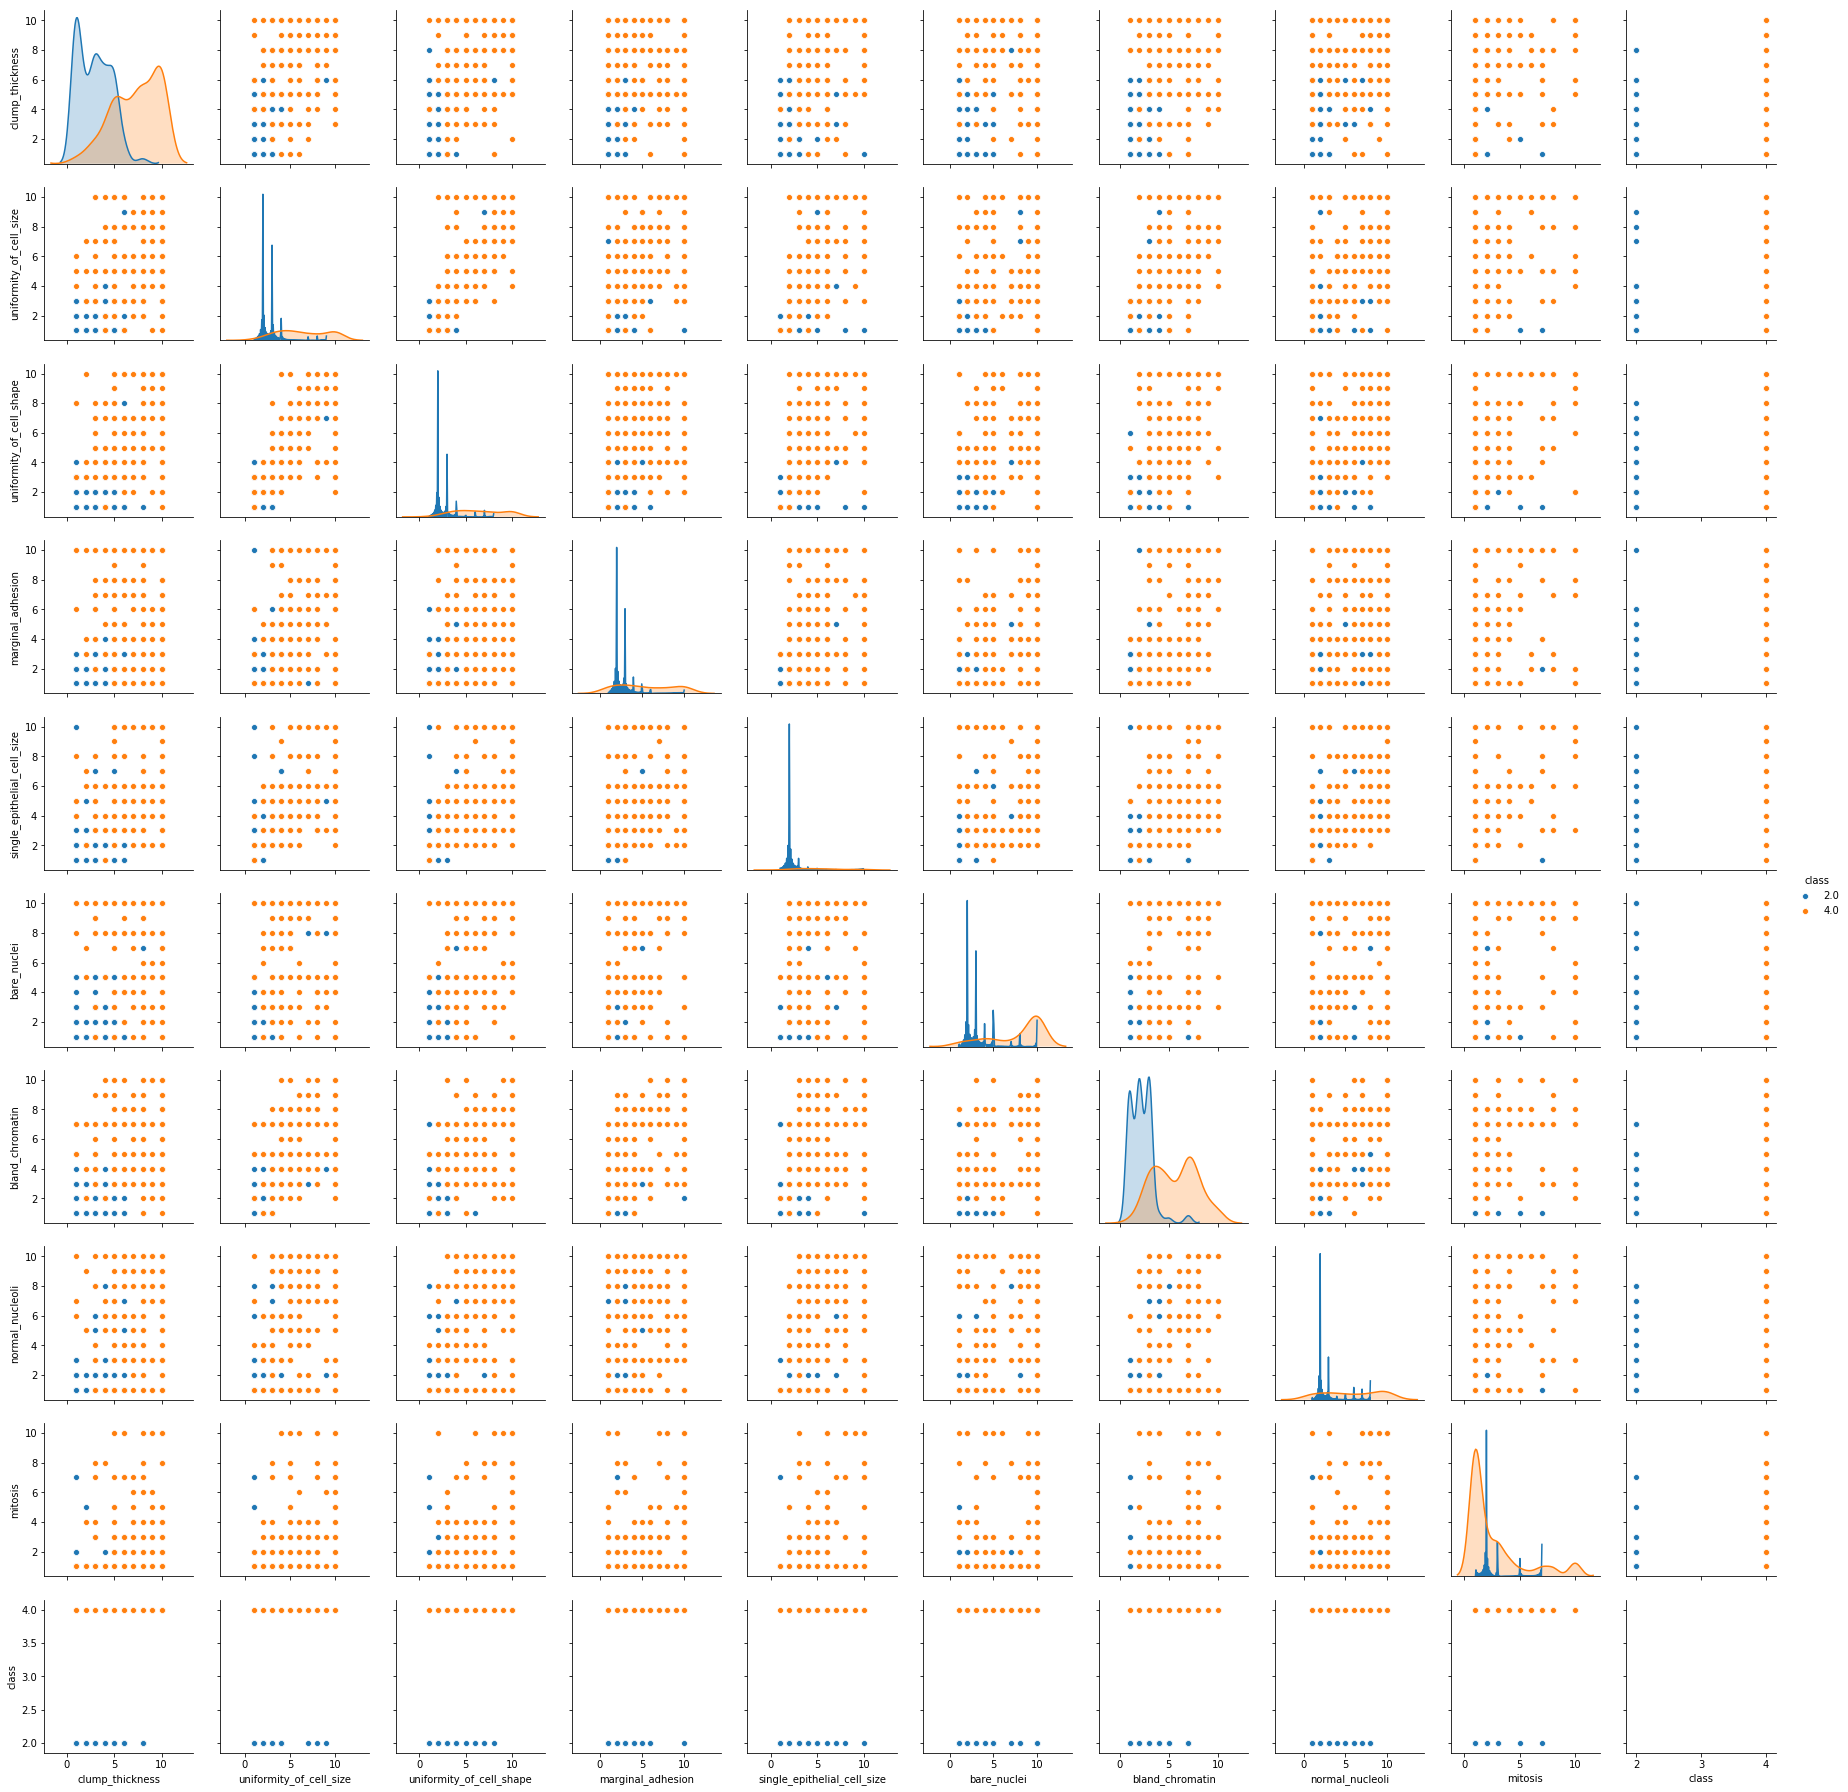

In [82]:
sns.pairplot(data=df, kind='scatter', hue='class')

In [83]:
df = pd.read_csv('gender_voice_scikit_onehot_dataset.csv')
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_1,label_2
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0,1.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0,1.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0,1.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0,1.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0,1.0
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,0.0,1.0
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,0.0,1.0
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,0.0,1.0
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,0.0,1.0
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,0.0,1.0
